# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

import csv

label2Name = {}
with open('./signnames.csv') as namesFile:
    nameReader = csv.reader(namesFile)
    for row in nameReader:
        label2Name[row[0]] = row[1]



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

#Number of training examples
n_train = X_train.shape[0]

#Number of validation examples
n_validation = X_valid.shape[0]

#Number of testing examples.
n_test = X_test.shape[0]

#What's the shape of an traffic sign image?
image_shape = X_train[0].shape

#How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

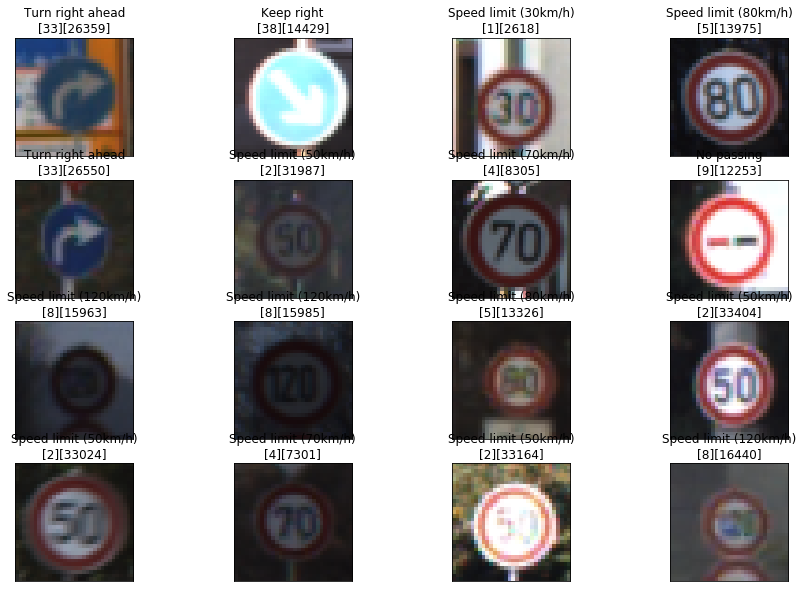

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def exploreData(images, labels, translation):
    """
    Visualize a random selection of images from `images`. 
    Showing the index and the label on the image title as:
    SIGNAL_NAME
    [label value][index value]
    """
    imgLength = len(images)
    assert(imgLength == len(labels))
    columns = 4
    rows = 4    
    imgW, imgH, _ = images[0].shape
    fig, axes = plt.subplots(rows, columns, figsize=(15,10),
                         subplot_kw={'xticks': [], 'yticks': []})
   
    indexes = list(random.randint(0, imgLength) for r in range(len(labels)))
    labelLimit = 25
    for ax, index in zip(axes.flat, indexes):
        ax.imshow(images[index])
        label = labels[index]
        name = translation[str(label)]
        if len(name) > labelLimit - 3:
            name = name[:labelLimit - 3] + '...'
        ax.set_title("{1}\n[{2}][{0}]".format(index, name, label))

exploreData(X_train, y_train, label2Name)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
import cv2 
from PIL import Image
from PIL.ImageOps import grayscale


def preprocessing(images):
    output = np.zeros((len(images), 32, 32, 3), np.float64)
    for index, img in enumerate(images):
        gray = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)
        output[index] = (gray.astype(np.float64) - 128)/128
    return output

X_train_processed = preprocessing(X_train)
X_test_processed = preprocessing(X_test)
X_valid_processed = preprocessing(X_valid)



In [5]:
n_train = X_train_processed.shape[0]

#Number of validation examples
n_validation = X_valid.shape[0]

#Number of testing examples.
n_test = X_test_processed.shape[0]

#What's the shape of an traffic sign image?
image_shape = X_train_processed[0].shape

#How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Model Architecture

In [6]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
BATCHES_PER_EPOCH = 5000

imagedatagen = ImageDataGenerator(rotation_range=15.,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)



Using TensorFlow backend.


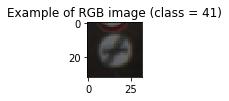

<function matplotlib.pyplot.show(*args, **kw)>

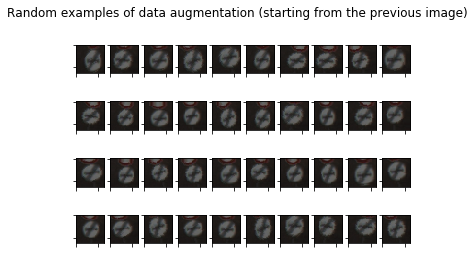

In [7]:
# take a random image from the training set
temp = X_train[10]

# plot the original image
plt.figure(figsize=(1,1))
plt.imshow(temp)
plt.title('Example of RGB image (class = {})'.format(y_train[0]))
plt.show()

# plot some randomly augmented images
rows, cols = 4, 10
fig, ax_array = plt.subplots(rows, cols)
for ax in ax_array.ravel():
    augmented_img, _ = imagedatagen.flow(np.expand_dims(temp, 0), y_train[0:1]).next()
    ax.imshow(np.uint8(np.squeeze(augmented_img)))
plt.setp([a.get_xticklabels() for a in ax_array.ravel()], visible=False)
plt.setp([a.get_yticklabels() for a in ax_array.ravel()], visible=False)
plt.suptitle('Random examples of data augmentation (starting from the previous image)')
plt.show

In [18]:

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    #Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x16.
    w_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma))
    b_1 = tf.Variable(tf.zeros(16))
    layer_1   = tf.nn.conv2d(x, w_1, strides=[1, 1, 1, 1], padding='VALID') + b_1
    
    #Activation.
    layer_1 = tf.nn.relu(layer_1)
    
    #Pooling. Input = 28x28x16. Output = 14x14x16.
    layer_1 = tf.nn.max_pool(layer_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Dropout Layer
    layer_1 = tf.nn.dropout(layer_1, keep_prob=keep_prob)
    
    #Layer 2: Convolutional. Output = 10x10x64.
    w_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    b_2 = tf.Variable(tf.zeros(64))
    layer_2 = tf.nn.conv2d(layer_1, w_2, strides=[1, 1, 1, 1], padding='VALID') + b_2
    
    #Activation.
    layer_2 = tf.nn.relu(layer_2)
    
    #Pooling. Input = 10x10x64. Output = 5x5x64.
    layer_2 = tf.nn.max_pool(layer_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Dropout Layer
    layer_2 = tf.nn.dropout(layer_2, keep_prob=keep_prob)
    
    #Flatten. Input = 5x5x64. Output = 1600.
    flatten_layer = flatten(layer_2)
    
    #Layer 3: Fully Connected. Input = 1600. Output = 240.
    w_3 = tf.Variable(tf.truncated_normal(shape = (1600,240), mean = mu, stddev = sigma))
    b_3 = b_1 = tf.Variable(tf.zeros(240))
    layer_3 = tf.add(tf.matmul(flatten_layer,w_3),b_3)
    
    #Activation.
    layer_3  = tf.nn.relu(layer_3)
    
    #Dropout Layer
    layer_3 = tf.nn.dropout(layer_3, keep_prob=keep_prob)
    
    #Layer 4: Fully Connected. Input = 240. Output = 84.
    w_4 = tf.Variable(tf.truncated_normal(shape = (240,84), mean = mu, stddev = sigma))
    b_4 = b_1 = tf.Variable(tf.zeros(84))
    layer_4 = tf.add(tf.matmul(layer_3,w_4),b_4)
    
    #Activation.
    layer_4  = tf.nn.relu(layer_4)
    
    #Dropout Layer
    layer_4 = tf.nn.dropout(layer_4, keep_prob=keep_prob)
    
    #Layer 5: Fully Connected. Input = 84. Output = 43.
    w_5 = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
    b_5 = b_1 = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(layer_4,w_5),b_5)
    return logits, layer_1, layer_2, layer_3, layer_4


In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

logits, layer_1, layer_2, layer_3, layer_4 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
import time
ValidationAccuracyByEpoch = []
TestingAccuracyByEpoch = []
TimeTakenByEpoch = []
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for epoch in range(EPOCHS):
        start = time.time()
        
        print("EPOCH {} ...".format(epoch + 1))

        batch_counter = 0
        for batch_x, batch_y in imagedatagen.flow(X_train_processed, y_train, batch_size=BATCH_SIZE):

            batch_counter += 1
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            if batch_counter == BATCHES_PER_EPOCH:
                print('Break')
                break

        # at epoch end, evaluate accuracy on both training and validation set
        train_accuracy = evaluate(X_train_processed, y_train)
        val_accuracy = evaluate(X_valid_processed, y_valid)
        print('Train Accuracy = {:.3f} - Validation Accuracy: {:.3f}'.format(train_accuracy, val_accuracy))
        # log current weights
        saver.save(sess, save_path='../checkpoints_2/traffic_sign_model.ckpt')
        elapsed_time_fl = (time.time() - start)
        print('Time Taken = {:.2f} seconds'.format(elapsed_time_fl))
        ValidationAccuracyByEpoch.append(val_accuracy)
        TestingAccuracyByEpoch.append(train_accuracy)
        TimeTakenByEpoch.append(elapsed_time_fl)


EPOCH 1 ...
Break
Train Accuracy = 0.761 - Validation Accuracy: 0.699
Test Accuracy = 0.720
Time Taken = 277.54 seconds
EPOCH 2 ...
Break
Train Accuracy = 0.918 - Validation Accuracy: 0.861
Test Accuracy = 0.877
Time Taken = 278.92 seconds
EPOCH 3 ...
Break
Train Accuracy = 0.948 - Validation Accuracy: 0.906
Test Accuracy = 0.909
Time Taken = 279.25 seconds
EPOCH 4 ...
Break
Train Accuracy = 0.966 - Validation Accuracy: 0.918
Test Accuracy = 0.926
Time Taken = 278.91 seconds
EPOCH 5 ...
Break
Train Accuracy = 0.982 - Validation Accuracy: 0.934
Test Accuracy = 0.938
Time Taken = 279.41 seconds
EPOCH 6 ...
Break
Train Accuracy = 0.984 - Validation Accuracy: 0.945
Test Accuracy = 0.944
Time Taken = 279.87 seconds
EPOCH 7 ...
Break
Train Accuracy = 0.987 - Validation Accuracy: 0.932
Test Accuracy = 0.940
Time Taken = 279.74 seconds
EPOCH 8 ...
Break
Train Accuracy = 0.990 - Validation Accuracy: 0.949
Test Accuracy = 0.949
Time Taken = 278.24 seconds
EPOCH 9 ...
Break
Train Accuracy = 0.991

In [10]:
with tf.Session() as sess:

    # restore saved session
    saver.restore(sess, '../checkpoints_2/traffic_sign_model.ckpt')
    
    test_accuracy = evaluate(X_test_processed, y_test)
    print('Performance on test set: {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ../checkpoints_2/traffic_sign_model.ckpt
Performance on test set: 0.958


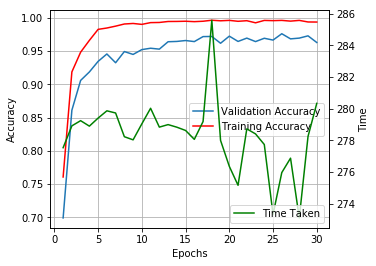

In [12]:
fig, axes = plt.subplots(ncols=1, figsize=(5, 4))
par1 = axes.twinx()
line1, = par1.plot(range(1, EPOCHS + 1), TimeTakenByEpoch, color = 'Green', label='Time Taken')
line2, = axes.plot(range(1, EPOCHS + 1), ValidationAccuracyByEpoch, label='Validation Accuracy')
line3, = axes.plot(range(1, EPOCHS + 1), TestingAccuracyByEpoch, color = 'Red', label='Training Accuracy')
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
par1.set_ylabel('Time')
axes.legend(loc = 7)
par1.legend(loc = 4)

axes.grid(True)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [12]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import glob
import matplotlib.image as mpimg

In [13]:
webImagesDir = 'TestImages'
imageNames = glob.glob('TestImages/*.jpg')
webImages = [ mpimg.imread('./' + imgName ) for imgName in imageNames ]

### Predict the Sign Type for Each Image

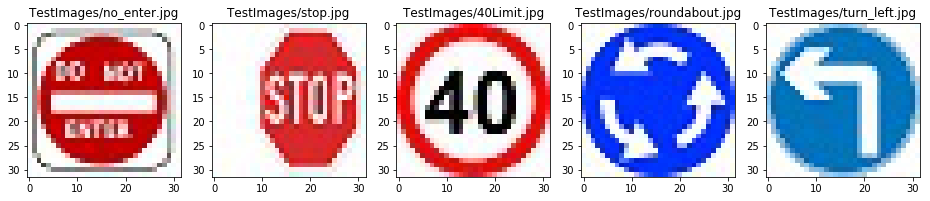

In [16]:

fig, axes = plt.subplots(ncols=len(webImages), figsize=(16, 8))
for ax, image, imageName in zip(axes, webImages, imageNames):
    ax.imshow(image)
    ax.set_title(imageName)


In [14]:
# Pre-processing
X_web = preprocessing(webImages)

INFO:tensorflow:Restoring parameters from ../checkpoints_2/traffic_sign_model.ckpt


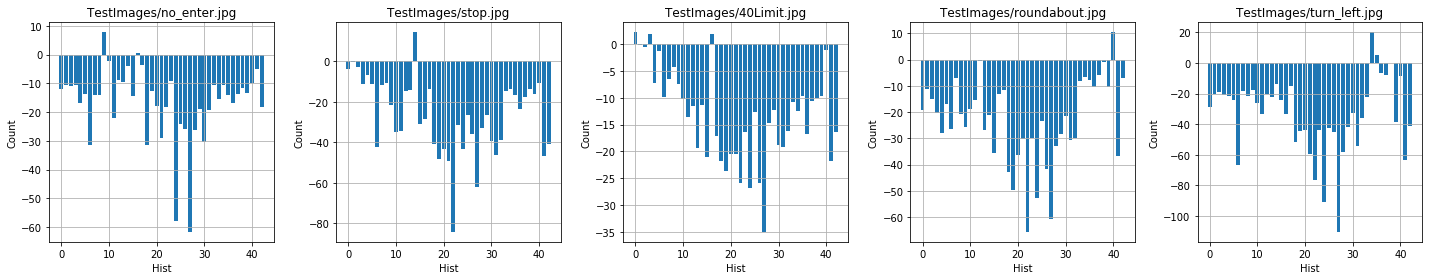

In [18]:
with tf.Session() as sess:
    saver.restore(sess, '../checkpoints_2/traffic_sign_model.ckpt')
    web_classes = sess.run(logits, feed_dict={x: X_web, keep_prob : 1.0})
    web_softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: X_web, keep_prob : 1.0})
    
    
def plotOutput(classes, names):
    """
    Plot the network output
    """
    nCols = len(classes)
    assert(nCols == len(names))
    
    fig, axes = plt.subplots(ncols=nCols, figsize=(4*nCols, 4))
    for ax, aClass, title in zip(axes, classes, names):        
        ax.bar(range(0,43), aClass)
        ax.set_xlabel('Hist')
        ax.set_ylabel('Count')
        ax.set_title(title)
        ax.grid(True)
        
    fig.tight_layout()
    plt.show()

plotOutput(web_classes, imageNames)

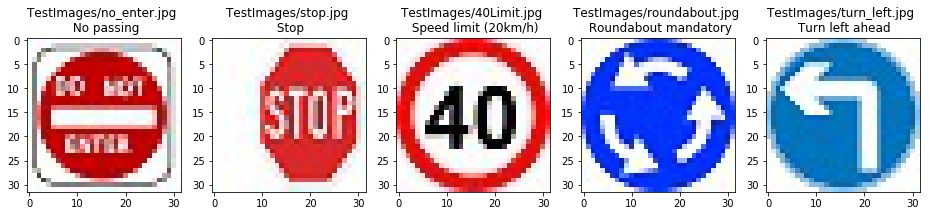

In [19]:
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(web_softmax, k=5, sorted=True))

namedPredictions = [ label2Name[str(predicts[1][i][0])] for i in range(0, len(imageNames))]

fig, axes = plt.subplots(ncols=len(webImages), figsize=(16, 8))
for ax, image, imageName, predictedName in zip(axes, webImages, imageNames, namedPredictions):
    index = predicts[1][1]
    ax.imshow(image)
    ax.set_title('{} \n {}'.format(imageName, predictedName))

### Analyze Performance

INFO:tensorflow:Restoring parameters from ../checkpoints_2/traffic_sign_model.ckpt


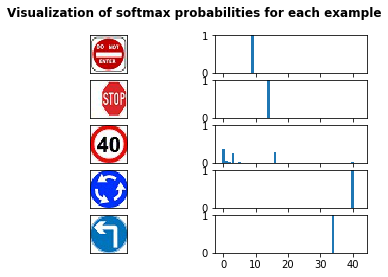

In [15]:
# visualizing softmax probabilities
with tf.Session() as sess:

    # restore saved session
    saver.restore(sess, '../checkpoints_2/traffic_sign_model.ckpt')

    # certainty of predictions
    K = 3
    top_3 = sess.run(tf.nn.top_k(logits, k=K), feed_dict={x: X_web, keep_prob: 1.})

    # compute softmax probabilities
    softmax_probs = sess.run(tf.nn.softmax(logits), feed_dict={x: X_web, keep_prob: 1.})

# plot softmax probs along with traffic sign examples
n_images = X_web.shape[0]
fig, axarray = plt.subplots(n_images, 2)
plt.suptitle('Visualization of softmax probabilities for each example', fontweight='bold')
for r in range(0, n_images):
    axarray[r, 0].imshow(np.squeeze(webImages[r]))
    axarray[r, 0].set_xticks([]), axarray[r, 0].set_yticks([])
    plt.setp(axarray[r, 0].get_xticklabels(), visible=False)
    plt.setp(axarray[r, 0].get_yticklabels(), visible=False)
    axarray[r, 1].bar(np.arange(n_classes), softmax_probs[r])
    axarray[r, 1].set_ylim([0, 1])


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:

for i in range(len(predicts[0])):
    print('Image: ' + imageNames[i])
    print('Probabilities:')
    for j in range(0, len(predicts[0][i])):
        prob = predicts[0][i][j]
        index = predicts[1][i][j]
        name = label2Name[str(index)]
        print('   {:.6f} : {} - {}'.format(prob, index, name))
    print()

Image: TestImages/no_enter.jpg
Probabilities:
   0.999076 : 9 - No passing
   0.000854 : 16 - Vehicles over 3.5 metric tons prohibited
   0.000046 : 10 - No passing for vehicles over 3.5 metric tons
   0.000012 : 17 - No entry
   0.000008 : 14 - Stop

Image: TestImages/stop.jpg
Probabilities:
   1.000000 : 14 - Stop
   0.000001 : 1 - Speed limit (30km/h)
   0.000000 : 2 - Speed limit (50km/h)
   0.000000 : 0 - Speed limit (20km/h)
   0.000000 : 4 - Speed limit (70km/h)

Image: TestImages/40Limit.jpg
Probabilities:
   0.373937 : 0 - Speed limit (20km/h)
   0.282115 : 16 - Vehicles over 3.5 metric tons prohibited
   0.254200 : 3 - Speed limit (60km/h)
   0.036830 : 1 - Speed limit (30km/h)
   0.024713 : 2 - Speed limit (50km/h)

Image: TestImages/roundabout.jpg
Probabilities:
   0.999967 : 40 - Roundabout mandatory
   0.000018 : 12 - Priority road
   0.000014 : 38 - Keep right
   0.000000 : 37 - Go straight or left
   0.000000 : 34 - Turn left ahead

Image: TestImages/turn_left.jpg
Proba